In [93]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
import torch.nn.functional as F
import json
from tqdm import tqdm
import csv
import time
from torch.utils.data import DataLoader
import sys
from torch import optim
sys.path.append("utils/")
from datasets.AstDataset import AstDataset
import matplotlib.pyplot as plt
from utils.TreePlotter import TreePlotter
from utils.TreePredictionNode import Node
from utils.TreeLstmUtils import batch_tree_input
from models.TreeLstmEncoder import TreeLstmEncoder
from models.TreeLstmDecoder import TreeLstmDecoder
from models.Vae import Vae
import numpy as np


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
csv.field_size_limit(sys.maxsize)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


9223372036854775807

In [54]:
for t_lab, lab, sib, par in zip(output['labels'], torch.argmax(output['predicted_labels'], dim=-1)[:100], output['predicted_has_siblings'][:100], output['predicted_is_parent'][:100]):
    print(t_lab.item(), lab.item(), round(sib.item(), 3), round(par.item(), 3))

0.0 0 0.027 0.958
2.0 2 0.753 1.0
3.0 3 1.0 0.001
4.0 4 0.0 1.0
5.0 5 0.493 0.0
25.0 6 0.045 0.262
5.0 5 0.751 0.005
30.0 30 0.061 0.897
18.0 18 0.064 0.845
43.0 43 0.0 0.005
2.0 2 0.896 1.0
3.0 3 1.0 0.001
4.0 4 0.0 1.0
5.0 5 0.493 0.0
34.0 6 0.045 0.262
43.0 43 0.998 0.109
6.0 6 0.0 0.003
2.0 2 0.919 1.0
3.0 3 1.0 0.001
4.0 4 0.0 1.0
5.0 5 0.493 0.0
43.0 6 0.045 0.262
2.0 2 0.91 1.0
3.0 3 1.0 0.001
4.0 4 0.0 1.0
5.0 5 0.493 0.0
6.0 6 0.045 0.262
2.0 2 0.898 1.0
3.0 3 1.0 0.001
4.0 4 0.0 1.0
5.0 5 0.493 0.0
17.0 6 0.045 0.262
15.0 2 0.896 1.0
5.0 5 1.0 0.041
16.0 16 0.999 0.001
11.0 11 0.453 0.98
19.0 19 0.813 0.968
2.0 2 0.208 1.0
3.0 3 1.0 0.0
4.0 4 0.0 1.0
5.0 5 0.436 0.0
2.0 2 0.445 1.0
3.0 3 1.0 0.0
4.0 4 0.0 1.0
5.0 5 0.436 0.0
50.0 24 0.933 0.988
24.0 53 0.992 0.816
24.0 17 0.996 0.137
17.0 17 0.998 0.021
17.0 17 0.001 0.004
17.0 17 0.03 0.005
11.0 11 0.01 0.959
19.0 19 0.754 0.992
2.0 2 0.169 1.0
3.0 3 1.0 0.0
4.0 4 0.0 1.0
5.0 5 0.407 0.0
18.0 6 0.015 0.188
6.0 6 0.0 0.003
2.

In [53]:
save_model(encoder, decoder, encoder_optimizer, decoder_optimizer, 'checkpoints/VAE_epoch1.tar')

In [9]:
for batch in loader:
    for key in batch.keys():
        if key != 'tree_sizes':
            batch[key] = batch[key].to(device)
            
    encoder.eval()
    decoder.eval()
    z, _, _ = encoder(batch)
    trees = decoder(z)
    break

In [89]:
TreePlotter.plot_predicted_tree(trees[1], 'generated_tree.png')


In [86]:
decoder.eval()
trees = decoder(z)

In [87]:
trees

In [71]:
batch['features'][578:800]

tensor([[ 0.],
        [ 7.],
        [ 8.],
        [ 9.],
        [15.],
        [ 5.],
        [16.],
        [11.],
        [25.],
        [ 5.],
        [30.],
        [51.],
        [33.],
        [17.],
        [17.],
        [19.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [24.],
        [24.],
        [17.],
        [17.],
        [17.],
        [19.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [17.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [35.],
        [19.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [36.],
        [17.],
        [17.],
        [37.],
        [17.],
        [11.],
        [24.],
        [17.],
        [21.],
        [17.],
        [17.],
        [41.],
        [17.],
        [21.],
        [1

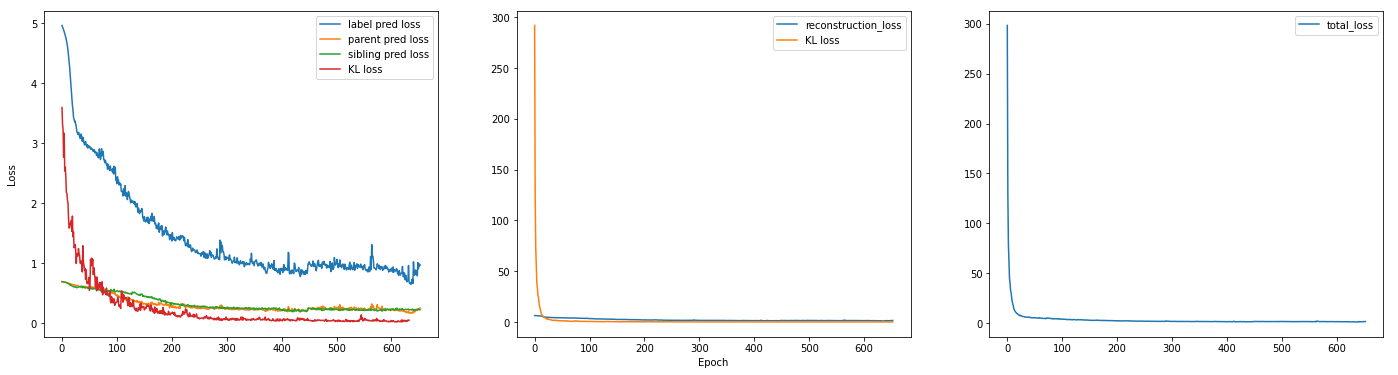

In [123]:
figure, ax = plt.subplots(1, 3, figsize=(24,6))
figure.add_subplot(111, frameon=False)

ax[0].plot(losses['label_prediction_loss'], label='label pred loss')
ax[0].plot(losses['parent_loss'], label='parent pred loss')
ax[0].plot(losses['sibling_loss'], label='sibling pred loss')
ax[0].plot(losses['kl_loss'][20:], label='KL loss')
ax[0].legend()

ax[1].plot(np.add(np.add(losses['label_prediction_loss'], losses['parent_loss']), losses['sibling_loss']), label='reconstruction_loss')
ax[1].plot(losses['kl_loss'], label='KL loss')
ax[1].legend()

ax[2].plot(losses['total_loss'], label='total_loss')
ax[2].legend()

plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [150]:
parents = list(set([el.item() for el in batch['adjacency_list'][:169][:, 0]]))

In [159]:
def build_tree(adj_list, features, index=0, parent_node=None):
    node = Node(features[index], parent=parent_node)
    children = adj_list[adj_list[:, 0] == index][:, 1]

    for child in children:
        build_tree(adj_list, features, child, node)

    return node
            

In [161]:
tree = build_tree(batch['adjacency_list'], batch['features'])

In [172]:
pred_tree = build_tree(batch['adjacency_list'], torch.argmax(output['predicted_labels'], dim=-1))

In [176]:
TreePlotter.plot_predicted_tree(pred_tree, 'predicted_tree.png')
TreePlotter.plot_predicted_tree(tree, 'actual_tree.png')

In [226]:
for index, (pred, true) in enumerate(zip(torch.argmax(output['predicted_labels'], dim=-1), output['labels'])):
    print(pred.item(), true.item())
    if index > 50:
        break

0 0.0
2 2.0
3 3.0
4 4.0
5 5.0
6 25.0
5 5.0
30 30.0
18 18.0
43 43.0
2 2.0
3 3.0
4 4.0
5 5.0
6 34.0
43 43.0
6 6.0
2 2.0
3 3.0
4 4.0
5 5.0
6 43.0
2 2.0
3 3.0
4 4.0
5 5.0
6 6.0
2 2.0
3 3.0
4 4.0
5 5.0
6 17.0
2 15.0
5 5.0
16 16.0
11 11.0
19 19.0
2 2.0
3 3.0
4 4.0
5 5.0
2 2.0
3 3.0
4 4.0
5 5.0
19 50.0
53 24.0
17 24.0
17 17.0
17 17.0
17 17.0
11 11.0


In [221]:
for index, (pred, true) in enumerate(zip(output['predicted_is_parent'], output['is_parent'])):
    print(pred.item(), true.item())
    if index > 50:
        break

0.9997850060462952 1.0
0.9993454813957214 1.0
0.0005445647984743118 0.0
0.9997802376747131 1.0
0.0003903243341483176 0.0
0.32433581352233887 1.0
0.0016980406362563372 0.0
0.8883258104324341 1.0
0.8576392531394958 1.0
0.014596741646528244 0.0
0.9996651411056519 1.0
0.0005445647984743118 0.0
0.9997802376747131 1.0
0.0003903243341483176 0.0
0.32433581352233887 1.0
0.1037544310092926 0.0
0.0025435499846935272 0.0
0.9996651411056519 1.0
0.0005445647984743118 0.0
0.9997802376747131 1.0
0.0003903243341483176 0.0
0.32433581352233887 0.0
0.9996651411056519 1.0
0.0005445647984743118 0.0
0.9997802376747131 1.0
0.0003903243341483176 0.0
0.32433581352233887 0.0
0.9996651411056519 1.0
0.0005445647984743118 0.0
0.9997802376747131 1.0
0.0003903243341483176 0.0
0.32433581352233887 0.0
0.9996651411056519 1.0
0.04661606252193451 0.0
0.0007113214815035462 0.0
0.9885280132293701 1.0
0.9675545692443848 1.0
0.9997628331184387 1.0
0.00014878938964102417 0.0
0.9999227523803711 1.0
0.00018493508105166256 0.0
0.

In [167]:
batch['adjacency_list']

tensor([[    0,     1],
        [    1,     2],
        [    1,     3],
        ...,
        [16335, 16338],
        [16338, 16339],
        [16339, 16340]], device='cuda:0')

In [168]:
batch['features']

tensor([[ 0.],
        [69.],
        [70.],
        ...,
        [11.],
        [25.],
        [ 5.]], device='cuda:0')

In [145]:
batch['adjacency_list'][:169][:, 0]

tensor([  0,   1,   1,   0,   4,   4,   4,   7,   7,   9,   4,  11,  11,  13,
          4,  15,  16,  17,  18,  18,  20,  21,  21,  23,  24,  24,  26,  26,
         20,   0,  30,  30,  32,  32,  34,  34,   0,  37,  37,  37,  40,  40,
         42,  37,  44,  44,  46,  37,  48,  49,  50,  50,  49,  53,  54,  48,
         56,   0,  58,  58,  58,  61,  62,  63,  63,  65,  61,  67,  67,  61,
         70,  71,  71,  73,  70,  75,  75,  77,  61,  79,  80,  80,  79,  61,
         84,  85,  85,  87,  84,  89,  89,  91,  61,  93,  94,  94,  93,  61,
         98,  99,  99, 101,  98, 103, 103, 105,  61, 107, 108, 108, 107,  61,
        112, 113, 113, 115, 115, 117, 118, 119, 120, 120, 122, 122, 119, 125,
        125, 127, 127, 118, 130, 131, 131, 133, 133, 130, 136, 136, 138, 138,
         61,  61, 142, 143, 143, 143,   0, 147, 147, 147, 150, 151, 151, 153,
        151, 150, 156, 157, 157, 159, 159, 150, 162, 163, 162, 165, 166, 165,
        165], device='cuda:0')

In [140]:
batch['features'][:170]

tensor([[ 0.],
        [69.],
        [70.],
        [70.],
        [71.],
        [ 5.],
        [16.],
        [26.],
        [ 3.],
        [ 4.],
        [ 5.],
        [26.],
        [ 3.],
        [ 4.],
        [ 5.],
        [11.],
        [23.],
        [57.],
        [25.],
        [ 5.],
        [30.],
        [25.],
        [ 5.],
        [30.],
        [25.],
        [ 5.],
        [30.],
        [17.],
        [17.],
        [43.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [34.],
        [43.],
        [ 6.],
        [15.],
        [ 5.],
        [16.],
        [26.],
        [ 3.],
        [ 4.],
        [ 5.],
        [26.],
        [ 3.],
        [ 4.],
        [ 5.],
        [11.],
        [27.],
        [55.],
        [17.],
        [17.],
        [11.],
        [23.],
        [ 6.],
        [23.],
        [ 6.],
        [15.],
        [ 5.],
        [16.],
        [11.],
        [19.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 

In [136]:
for index, (lab, feat) in enumerate(zip(output['labels'], batch['features'])):
    print(lab, feat)
    if index > 100:
        break

tensor(0., device='cuda:0') tensor([0.], device='cuda:0')
tensor(69., device='cuda:0') tensor([69.], device='cuda:0')
tensor(70., device='cuda:0') tensor([70.], device='cuda:0')
tensor(70., device='cuda:0') tensor([70.], device='cuda:0')
tensor(71., device='cuda:0') tensor([71.], device='cuda:0')
tensor(5., device='cuda:0') tensor([5.], device='cuda:0')
tensor(16., device='cuda:0') tensor([16.], device='cuda:0')
tensor(26., device='cuda:0') tensor([26.], device='cuda:0')
tensor(3., device='cuda:0') tensor([3.], device='cuda:0')
tensor(4., device='cuda:0') tensor([4.], device='cuda:0')
tensor(5., device='cuda:0') tensor([5.], device='cuda:0')
tensor(26., device='cuda:0') tensor([26.], device='cuda:0')
tensor(3., device='cuda:0') tensor([3.], device='cuda:0')
tensor(4., device='cuda:0') tensor([4.], device='cuda:0')
tensor(5., device='cuda:0') tensor([5.], device='cuda:0')
tensor(11., device='cuda:0') tensor([11.], device='cuda:0')
tensor(23., device='cuda:0') tensor([23.], device='cuda:

In [133]:
batch['features']

tensor([[ 0.],
        [69.],
        [70.],
        ...,
        [11.],
        [25.],
        [ 5.]], device='cuda:0')

In [124]:
for index, (pred, true) in enumerate(zip(torch.argmax(output['predicted_labels'], dim=-1), output['labels'])):
    print(pred.item(), true.item())
    
    if index > 500:
        break

17 0.0
15 69.0
70 70.0
70 70.0
71 71.0
5 5.0
16 16.0
26 26.0
3 3.0
4 4.0
5 5.0
26 26.0
3 3.0
4 4.0
5 5.0
26 11.0
19 23.0
6 57.0
25 25.0
5 5.0
30 30.0
17 25.0
5 5.0
30 30.0
17 25.0
5 5.0
30 30.0
17 17.0
17 17.0
31 43.0
69 2.0
3 3.0
4 4.0
5 5.0
6 34.0
43 43.0
6 6.0
2 15.0
5 5.0
16 16.0
11 26.0
3 3.0
4 4.0
5 5.0
11 26.0
3 3.0
4 4.0
5 5.0
11 11.0
19 27.0
49 55.0
17 17.0
6 17.0
11 11.0
23 23.0
6 6.0
27 23.0
6 6.0
15 15.0
5 5.0
16 16.0
11 11.0
19 19.0
2 2.0
3 3.0
4 4.0
5 5.0
24 24.0
17 17.0
17 17.0
50 19.0
2 2.0
3 3.0
4 4.0
5 5.0
2 2.0
3 3.0
4 4.0
5 5.0
24 24.0
17 24.0
24 17.0
17 17.0
17 17.0
50 19.0
2 2.0
3 3.0
4 4.0
5 5.0
2 2.0
3 3.0
4 4.0
5 5.0
24 24.0
17 24.0
24 17.0
17 17.0
17 17.0
50 19.0
2 2.0
3 3.0
4 4.0
5 5.0
2 2.0
3 3.0
4 4.0
5 5.0
24 24.0
17 24.0
24 17.0
17 17.0
17 17.0
50 19.0
2 2.0
3 3.0
4 4.0
5 5.0
6 57.0
6 28.0
28 49.0
17 25.0
5 5.0
30 30.0
17 17.0
17 17.0
6 25.0
5 5.0
30 30.0
17 17.0
17 17.0
11 49.0
17 25.0
5 5.0
30 30.0
17 17.0
17 17.0
6 25.0
5 5.0
30 30.0
17 17.0
17 17.0
24

tensor([ 0.,  2.,  3.,  ..., 17., 23.,  6.], device='cuda:0')

In [ ]:
for batch in loader:
    break

z, _, _ = encoder(batch)

In [120]:
for batch in tqdm(loader, position=0):
    if batch['tree_sizes'][0] < 30:
        data = batch
        break
        
for key in data.keys():
        if key != 'tree_sizes':
            data[key] = data[key].to(device)

encoder.train()
decoder.train()

encoder_optimizer = optim.Adam(encoder.parameters(), lr=0.001)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=0.001)
vae_loss = VaeLoss()

pbar = tqdm(unit='batch', position=0)
for i in range(1000):
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()
            
    z, z_mean, z_log_var = encoder(data)
    reconstructed_tree, output = decoder(z, data)
    
    loss = vae_loss(output, z_mean, z_log_var, len(reserved_tokens))
    loss.backward()    
    encoder_optimizer.step()
    decoder_optimizer.step()
    pbar.set_postfix(loss=round(loss.item(), 3))
    pbar.update()
#     tree = retrieve_tree(batch['features'], batch['adjacency_list'], 0)

{'total_loss': [tensor(161.2562, device='cuda:0', grad_fn=<AddBackward0>),
  tensor(79.3005, device='cuda:0', grad_fn=<AddBackward0>),
  tensor(47.3698, device='cuda:0', grad_fn=<AddBackward0>),
  tensor(40.6093, device='cuda:0', grad_fn=<AddBackward0>),
  tensor(26.8318, device='cuda:0', grad_fn=<AddBackward0>),
  tensor(25.8960, device='cuda:0', grad_fn=<AddBackward0>),
  tensor(20.6566, device='cuda:0', grad_fn=<AddBackward0>),
  tensor(17.4204, device='cuda:0', grad_fn=<AddBackward0>),
  tensor(17.9077, device='cuda:0', grad_fn=<AddBackward0>),
  tensor(15.7321, device='cuda:0', grad_fn=<AddBackward0>)],
 'label_prediction_loss': [tensor(4.9460, device='cuda:0', grad_fn=<NllLossBackward>),
  tensor(4.9242, device='cuda:0', grad_fn=<NllLossBackward>),
  tensor(4.9006, device='cuda:0', grad_fn=<NllLossBackward>),
  tensor(4.8806, device='cuda:0', grad_fn=<NllLossBackward>),
  tensor(4.8529, device='cuda:0', grad_fn=<NllLossBackward>),
  tensor(4.8278, device='cuda:0', grad_fn=<NllLos

In [ ]:
TreePlotter.plot_predicted_tree(reconstructed_tree[0], 'predicted_tree.png')

In [475]:
reader = csv.reader(open('../data/ast_trees_200k/asts.csv'))

next(reader)

TreePlotter.plot_tree(JsonImporter().import_(next(reader)[1]), 'first_tree.png')


(<utils.TreePredictionNode.Node at 0x7fb669acf2e0>,
 <utils.TreePredictionNode.Node at 0x7fb669acf730>)

In [ ]:
        trees = []
        offset = 0
        counter = TreeNodeCounter()
                
        # Build tree by tree in batch
        for index, z in enumerate(inp_batch):
            # Initialize hidden_parent values
            hidden_parent = (z.unsqueeze(0), torch.zeros(self.latent_size).unsqueeze(0).to(device))
          
            if self.training:
                tree_size = target['tree_sizes'][index]
                
                adjacency_list_tree = batch['adjacency_list'][(batch['adjacency_list'][:,0] >= offset) & (batch['adjacency_list'][:,0] < offset + tree_size)]
                                
                tree, counter = self.build_tree(hidden_parent, None, output, None, counter, target['features'], adjacency_list_tree, node_index=offset)
                offset += tree_size
            else:
                tree, counter = self.build_tree(hidden_parent, None, output, None, counter)
                
            trees.append(tree)
            counter.increase()
                            
        return trees, output
            
        
    def build_tree(self, hidden_parent, hidden_sibling, output, parent_node=None, index=0,
                   features=None, adjacency_list=None, siblings=[], node_index=0):
                
        # Split hidden parent, into state and cell
        hidden_state_parent, hidden_cell_parent = hidden_parent      
        # Run hidden parent state through U_parent
        U_parent = self.U_parent(hidden_state_parent)
        
        # If there was a previous sibling, calculate U_sibling, otherwise use 0 to not include this value
        if hidden_sibling is not None:
            hidden_state_sibling, hidden_cell_sibling = hidden_sibling
            U_sibling = self.U_sibling(hidden_state_sibling)
        else:
            U_sibling = 0
        
        # tanh(U_parent + U_sibling)
        h_pred = torch.tanh(U_parent + U_sibling)
        label_pred = self.label_prediction(h_pred)
        
        # Probability of the node having children
        p_parent = self.sigmoid(self.depth_pred(h_pred))
        # Probability of the node having successor children
        p_sibling = self.sigmoid(self.width_pred(h_pred))
        
        # Teacher forcing on is_parent, has_sibling
        if self.training:
            label, child_indices = self.get_truth_values(features, adjacency_list, node_index)
            is_parent = torch.tensor([1], device=device, dtype=torch.float32) if len(child_indices) > 0 else torch.tensor([0], device=device, dtype=torch.float32)
            has_sibling = torch.tensor([1], device=device, dtype=torch.float32) if len(siblings) > 1 else torch.tensor([0], device=device, dtype=torch.float32)
        else:
            # Sample is_parent and has_sibling from predicted probability of parent/sibling
            is_parent = torch.distributions.bernoulli.Bernoulli(p_parent).sample()
            has_sibling = torch.distributions.bernoulli.Bernoulli(p_sibling).sample()
            
            # Could also simply use > 0.5 instead OR TODO BEAM SEARCH
            # is_parent = torch.tensor(1) if p_parent > 0.5 else torch.tensor(0)
            # has_sibling = torch.tensor(1) if p_sibling > 0.5 else torch.tensor(0)
            
        
        # Node label prediction
        predicted_label = self.softmax(label_pred + self.offset_parent(is_parent) + self.offset_sibling(has_sibling))
        
        # Build tree: Add node to tree
        if parent_node is None:
            node = Node(torch.argmax(predicted_label, dim=-1), parent=None)
        else:
            node = Node(torch.argmax(predicted_label, dim=-1), parent=parent_node)
            
        # For computing loss, save output (predictions and true values)
        output['predicted_labels'][index.get()] = predicted_label
        output['labels'][index.get()] = label
        output['predicted_has_siblings'][index.get()] = p_sibling
        output['has_siblings'][index.get()] = has_sibling
        output['predicted_is_parent'][index.get()] = p_parent
        output['is_parent'][index.get()] = is_parent
            
        
        # Teacher forcing on label
        if self.training:
            label = F.one_hot(label.long(), self.vocab_size).float()
        else:
            label = predicted_label
            
        
        if has_sibling:
            index.increase()
            if hidden_sibling is not None:
                hidden_sibling = self.lstm_sibling(label, hidden_sibling)
            else:
                hidden_sibling = self.lstm_sibling(label)
            
            if self.training:
                siblings.pop(0)
                self.build_tree(hidden_parent, hidden_sibling, output, parent_node, index, features, adjacency_list, siblings, siblings[0])
                
            else:
                self.build_tree(hidden_parent, hidden_sibling, output, parent_node, index)
            
        if is_parent:
            index.increase()
            hidden_parent = self.lstm_parent(label, hidden_parent)
            parent_node = node
            
            if self.training:
                siblings = list(child_indices)
                self.build_tree(hidden_parent, None, output, parent_node, index, features, adjacency_list, siblings, siblings[0])
                
            else:
                self.build_tree(hidden_parent, None, output, parent_node, index)
                
        return parent_node, index
        
        
    def get_truth_values(self, features, adjacency_list, index):
        adjacency_list_current = adjacency_list[adjacency_list[:, 0] == index]

        x = features[index, :]
        child_indices = adjacency_list_current[:, 1]

        return x, child_indices
    
    
class TreeNodeCounter:
    def __init__(self):
        self.counter = 0
        
    def increase(self):
        self.counter += 1
    
    def get(self):
        return self.counter
    
    def reset(self):
        self.counter = 0